<h1>Data cleaning</h1>
<hr>
<p>In this module we will:</p>
<ul>
    <li>Remove unwanted outliers</li>
    <li>Remove unwanted observations</li>
    <li>Label missing categorical data</li>
    <li>Drop unwanted outliers</li>
    <li>Flag and fill missing numerical data</li>
    <li>Change to correct data types</li>
</ul>

In [86]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [87]:
#import dataset
df=pd.read_csv("kenya_listings_2023.csv")

In [88]:
df.shape

(16117, 17)

<h2>Flag and fill missing numerical data</h2>
<p>Checking null/missing values in the dataset</p>

In [89]:
#df.select_dtypes(exclude=['object']).isnull().sum()
count=df.isna().sum()
percent=((count/df.shape[0])*100)
null=pd.DataFrame(pd.concat([count,percent],keys=['Missing values','% Missing values'],axis=1))
null

,Missing values,% Missing values
id,0,0.000000
price,3,0.018614
price_qualifier,8870,55.035056
bedrooms,0,0.000000
bathrooms,0,0.000000
toilets,10028,62.220016
furnished,0,0.000000
serviced,0,0.000000
shared,0,0.000000
parking,0,0.000000


In [90]:
# Missing toilet values should be 0
df['toilets'] = df['toilets'].fillna(0)

In [91]:
df['price'] = df['price'].fillna(0)

<h2>Fixing structural errors</h2>

In [92]:
df.price_qualifier.value_counts()

per month                       6227
per calendar month               373
per plot                         228
per acre                         128
per square foot / per month      112
per day                           62
per square meter / per month      55
per square foot / per week        46
per hectare                        6
per square meter / per week        5
per square foot / per annum        3
per square foot                    1
per square meter                   1
Name: price_qualifier, dtype: int64

In [93]:
df.type.value_counts()

House                   6026
Apartment               5840
Land                    2669
Commercial Property     1580
Event Centre / Venue       2
Name: type, dtype: int64

In [94]:
df.sub_type.value_counts()

Townhouse                               1563
Office Space                             872
Residential Land                         810
Detached Duplex                          630
Detached Bungalow                        579
Mixed-use Land                           376
Semi-detached Bungalow                   286
Mini Flat                                244
Commercial Land                          205
Bedsitter (Single Room)                  191
Warehouse                                186
Semi-detached Duplex                      74
Terraced Duplex                           55
Shop                                      45
Plaza / Complex / Mall                    45
Block of Flats                            30
Terraced Bungalow                         29
Hotel / Guest House                       27
Restaurant / Bar                          24
Industrial Land                           14
School                                     5
Factory                                    3
Filling St

In [95]:
df.state.value_counts()

Nairobi          8935
Kiambu           2694
Kajiado          1294
Mombasa          1125
Machakos          534
Kilifi            480
Nakuru            290
Kisumu            150
Laikipia           97
Kwale              78
Embu               44
Uasin Gishu        43
Meru               42
Nyeri              39
Nandi              38
Makueni            30
Baringo            28
Muranga            27
Bungoma            21
Kirinyaga          17
Kitui              13
Nyandarua          12
Kericho            11
Kakamega           10
Trans Nzoia        10
Kisii               9
Isiolo              7
Lamu                6
Busia               6
Narok               4
Tharaka-Nithi       3
Bomet               3
Homa Bay            3
Garissa             2
Migori              2
Siaya               2
Samburu             2
Vihiga              2
Taita Taveta        1
West Pokot          1
Marsabit            1
Turkana             1
Name: state, dtype: int64

In [96]:
df.locality.value_counts()

Westlands          2446
Kilimani           1199
Kikuyu             1064
Lavington           891
Karen               750
                   ... 
Silale                1
Ting'Ang'A            1
Migwani               1
Kadzandani            1
Lodwar Township       1
Name: locality, Length: 357, dtype: int64

In [97]:
df.sub_locality.value_counts()

Runda              553
Loresho            107
South C             83
Industrial Area     80
Thigio              34
Muthaiga North      23
Old Muthaiga        22
Chiromo             20
South B             19
Rimpa               18
Tassia              13
Yukos               11
Imara Daima         10
Githurai 44         10
Rosslyn              9
Clay City            8
Githurai 45          5
Umoja Phase 1        5
Lucky Summer         4
New Muthaiga         3
Umoja Phase 2        3
Mukuru Village       1
Kariba               1
Kihingo              1
Kwa Njenga           1
Lindi                1
Kiembeni             1
Name: sub_locality, dtype: int64

In [98]:
df.category.value_counts()

For Sale         9108
For Rent         6916
Short Let          84
Joint Venture       9
Name: category, dtype: int64

<p>We should change those apartment properties that have zero bedrooms to become bedsitter sub type</p>

In [99]:
df.loc[(df['bedrooms']==0)&(df['sub_type']=='Missing')].shape
#Bedsitter (Single Room)

(0, 17)

In [100]:
df.loc[(df['bedrooms']==0)&(df['sub_type']=='Missing'),'sub_type']='Bedsitter (Single Room)'

<p>We are going to change price qualifiers with the value 'per calender month' to be 'per month'</p>

In [101]:
df.loc[(df['price_qualifier']=='per calendar month'),'price_qualifier']='per month'

In [102]:
df.price_qualifier.value_counts()

per month                       6600
per plot                         228
per acre                         128
per square foot / per month      112
per day                           62
per square meter / per month      55
per square foot / per week        46
per hectare                        6
per square meter / per week        5
per square foot / per annum        3
per square foot                    1
per square meter                   1
Name: price_qualifier, dtype: int64

<p>We are going to change properties that are listed for rent to all have price qualifier of per month</p>

In [103]:
df.loc[(df['category']=='For Rent')&(df['price_qualifier']=='Missing'),'price_qualifier']='per month'

<p>We are going to make all properties listed for sale to have a price qualifier of sale</p>

In [104]:
df.loc[(df['category']=='For Sale')&(df['price_qualifier']=='Missing'),'price_qualifier']='Sale'

In [105]:
df.category.value_counts()

For Sale         9108
For Rent         6916
Short Let          84
Joint Venture       9
Name: category, dtype: int64

<p>we are going to change properties with short let to be rental properties</p>

In [106]:
df.loc[(df['category']=='Short Let'),'category']='For Rent'

<p>We are going to change block of flats from house to apartments</p>

In [107]:
df.loc[(df['sub_type']=='Block of Flats'),'type']='Apartment'

<h2>Labelling missing categorical features</h2>

In [108]:
df.select_dtypes(include=['object']).isnull().sum()

price_qualifier     8870
category               0
type                   0
sub_type            9817
state                  0
locality               6
sub_locality       15071
listdate               0
dtype: int64

In [109]:
for column in df.select_dtypes(include=['object']).columns.tolist():
    df[column] = df[column].fillna('Missing')

In [110]:
df.select_dtypes(include=['object']).isnull().sum()

price_qualifier    0
category           0
type               0
sub_type           0
state              0
locality           0
sub_locality       0
listdate           0
dtype: int64

<h2>Dropping unwanted observations</h2>

In [111]:
#removing duplicates in the dataset
df=df.drop_duplicates()
df.shape

(16117, 17)

<p>
    There are some properties that will be removed in the dataset which includes:
    <ul>
        <li>Property types-land,commercial property,event centers since we are interested in habitable premises such as apartments and houses.</li>
    </ul>
</p>
    

In [112]:
df=df.loc[(df['type']=='House')| (df['type']=='Apartment')]

<ul>
    <li>Remove properties with joint venture attribute in category</li>
<ul>

In [113]:
df=df.loc[(df['category']!='Joint Venture')]

<ul>
    <li>Remove properties with per day attribute in price qualifier</li>
<ul>

In [114]:
df.loc[(df['price_qualifier']=='per day')].shape

(61, 17)

In [115]:
df=df.loc[(df['price_qualifier'])!='per day']
df.loc[(df['price_qualifier']=='per day')].shape

(0, 17)

<ul>
    <li>Properties with price of zero</li>
<ul>

In [116]:
df.loc[(df['price']==0)].shape

(61, 17)

In [117]:
df=df.loc[(df['price'])!=0]
df.loc[(df['price']==0)].shape

(0, 17)

<ul>
    <li>Properties that have no toilets and bathrooms.</li>
    <sub>we did not remove toilet==0 Or bathrooms==0 since some properties may combine toilet and bathroom into a shared facility</sub>
</ul>

In [118]:
df.loc[(df['toilets']==0)&(df['bathrooms']==0)].shape

(2227, 17)

In [119]:
df=df.loc[~((df['toilets']==0)&(df['bathrooms']==0))]
df.loc[(df['toilets']==0)&(df['bathrooms']==0)].shape

(0, 17)

<ul>
    <li>Properties that have missing value for the locality column.</li>
</ul>

In [120]:
df.loc[(df['locality']=='Missing')].shape

(3, 17)

In [121]:
df=df.loc[~(df['locality']=='Missing')]
df.loc[(df['locality']=='Missing')].shape

(0, 17)

<ul>
    <li>Bedsitters with bedrooms</li>
<ul>

In [122]:
df.loc[(df['sub_type']=='Bedsitter (Single Room)')&(df['bedrooms']!=0)].shape

(3, 17)

In [123]:
df=df.loc[~((df['sub_type']=='Bedsitter (Single Room)')&(df['bedrooms']!=0))]
df.loc[(df['sub_type']=='Bedsitter (Single Room)')&(df['bedrooms']!=0)].shape

(0, 17)

<ul>
    <li>some house types should not be having zero number of bedrooms</li>
<ul>

In [124]:
df.loc[(df['bedrooms']==0)&(df['type']=='House')].sub_type.value_counts()

Townhouse            2
Missing              1
Detached Bungalow    1
Name: sub_type, dtype: int64

In [125]:
df=df.loc[~((df['bedrooms']==0)&(df['type']=='House'))]
df.loc[(df['bedrooms']==0)&(df['type']=='House')].shape

(0, 17)

In [126]:
#replace rental price for this property
df.loc[(df['id']==554,'price')]=28000

<h2>Removing unwanted outliers</h2>

In [127]:
df.shape

(9505, 17)

In [128]:
df_rental=df[df.category == 'For Rent']
df_sale=df[df.category=='For Sale']

<Axes: xlabel='bedrooms'>

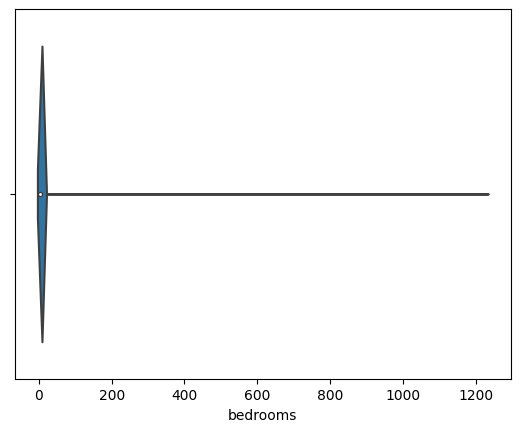

In [129]:
sns.violinplot(x= 'bedrooms', data=df)

In [130]:
df.loc[(df['bedrooms']>6)].sort_values(by='bedrooms',ascending=False).head(10)

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate
15282,15290,213123.0,Missing,1231,1,1.0,1,0,0,1,For Rent,House,Detached Bungalow,Kiambu,Kinale,Missing,30/04/2023 09:46
3419,3420,28000000.0,Missing,50,20,0.0,0,0,0,0,For Sale,Apartment,Missing,Kiambu,Kikuyu,Missing,29/07/2021 13:49
16029,16037,50000000.0,Missing,44,4,4.0,0,0,0,6,For Sale,House,Townhouse,Kajiado,Ngong,Missing,13/06/2023 18:07
7620,7621,110000.0,per month,43,3,0.0,0,0,0,0,For Rent,House,Semi-detached Duplex,Nairobi,Kileleshwa,Missing,26/08/2021 15:11
10436,10437,6200000.0,Missing,32,2,2.0,1,0,0,1,For Sale,House,Missing,Kiambu,Kikuyu,Missing,13/10/2022 16:51
14499,14507,12000.0,per month,11,1,1.0,0,0,0,1,For Rent,House,Semi-detached Bungalow,Kiambu,Juja,Missing,15/03/2023 09:12
14887,14895,100000000.0,Missing,10,8,10.0,0,0,0,0,For Sale,House,Missing,Nairobi,Karen,Missing,04/04/2023 10:58
14729,14737,110000000.0,Missing,10,10,10.0,0,0,0,0,For Sale,House,Townhouse,Nairobi,Karen,Missing,26/03/2023 17:02
14728,14736,650000.0,Missing,10,10,10.0,0,0,0,0,For Rent,House,Townhouse,Nairobi,Karen,Missing,26/03/2023 16:28
14686,14694,140000000.0,Missing,10,9,2.0,0,0,0,0,For Sale,House,Detached Duplex,Nairobi,Karen,Missing,24/03/2023 14:21


In [131]:
#remove properties with more than 10
df = df[df.bedrooms <= 8]
df.shape

(9483, 17)

<Axes: xlabel='bathrooms'>

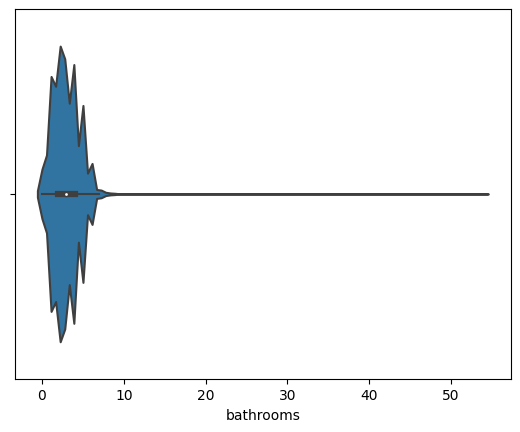

In [132]:
sns.violinplot(x= 'bathrooms', data=df)

In [133]:
df.sort_values(by='bathrooms',ascending=True).tail(10)

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate
9664,9665,185000000.0,Missing,8,9,9.0,0,0,0,5,For Sale,House,Missing,Nairobi,Westlands,Runda,07/09/2022 20:36
5911,5912,10000000.0,Missing,4,10,0.0,0,0,0,0,For Sale,House,Townhouse,Nairobi,Spring Valley,Missing,17/08/2021 15:38
12881,12889,10000.0,per month,1,11,1.0,0,0,0,1,For Rent,House,Missing,Mombasa,Tudor,Missing,25/01/2023 15:25
12750,12758,12000.0,per month,1,11,1.0,0,0,0,1,For Rent,House,Missing,Mombasa,Nyali,Missing,19/01/2023 13:28
8813,8814,8500000.0,Missing,3,21,3.0,0,0,0,1,For Sale,Apartment,Missing,Kilifi,Mtwapa,Missing,22/06/2022 08:58
11489,11490,13000.0,per month,2,23,2.0,0,0,0,2,For Rent,House,Missing,Mombasa,Bamburi,Missing,30/11/2022 11:08
10477,10478,12250000.0,Missing,2,32,3.0,0,1,0,0,For Sale,Apartment,Missing,Nairobi,Lavington,Missing,18/10/2022 11:28
15731,15739,120000.0,per month,3,32,0.0,0,0,0,2,For Rent,Apartment,Missing,Nairobi,Westlands,Missing,31/05/2023 12:18
15882,15890,30000.0,per month,3,32,3.0,0,0,0,2,For Rent,House,Terraced Duplex,Nakuru,London,Missing,06/06/2023 18:04
9764,9765,59000000.0,Missing,4,54,4.0,0,1,0,0,For Sale,House,Townhouse,Mombasa,Nyali,Missing,14/09/2022 07:19


In [134]:
# Remove bathrooms more than 10
df = df[df.bathrooms <= 8]
df.shape

(9466, 17)

<Axes: xlabel='serviced'>

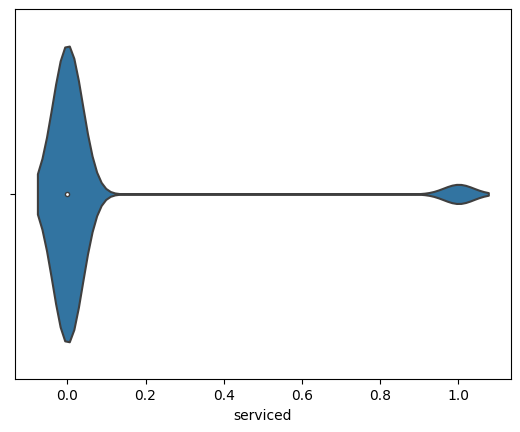

In [135]:
sns.violinplot(x= 'serviced', data=df)

<Axes: xlabel='shared'>

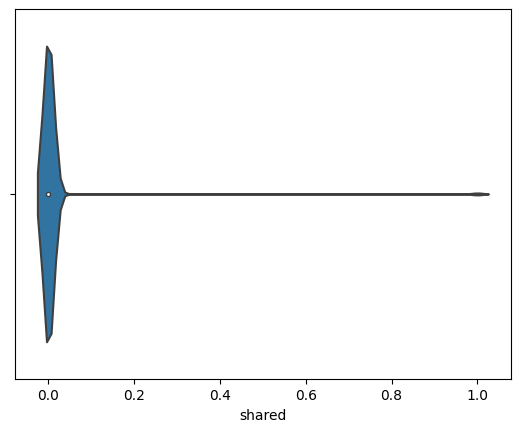

In [136]:
sns.violinplot(x= 'shared', data=df)

<Axes: xlabel='furnished'>

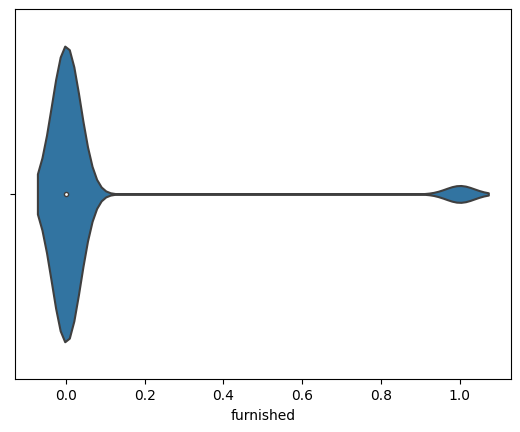

In [137]:
sns.violinplot(x= 'furnished', data=df)

<Axes: xlabel='parking'>

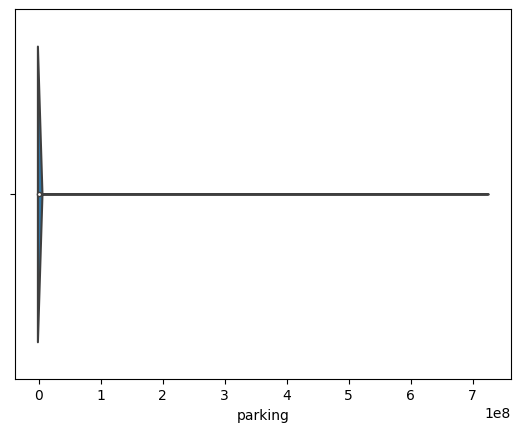

In [138]:
sns.violinplot(x= 'parking', data=df)

In [139]:
df.sort_values(by='parking').tail()

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate
8807,8808,120000.0,per month,3,3,4.0,0,0,0,22,For Rent,Apartment,Missing,Mombasa,Nyali,Missing,21/06/2022 17:36
14672,14680,1200000.0,per month,8,4,4.0,0,0,0,50,For Rent,House,Missing,Nairobi,Lavington,Missing,23/03/2023 21:47
15742,15750,35000.0,per month,1,1,1.0,0,0,0,100,For Rent,Apartment,Missing,Kiambu,Ruaka,Missing,31/05/2023 16:07
15767,15775,11000.0,per month,1,1,1.0,0,0,0,118453525,For Rent,Apartment,Missing,Kisumu,Market Milimani,Missing,01/06/2023 17:09
15756,15764,9000.0,per month,1,0,1.0,0,0,0,723110898,For Rent,House,Missing,Kiambu,Ruaka,Missing,01/06/2023 13:25


In [140]:
#remove parking greater than 10
df = df[df.parking < 6]
df.shape

(9364, 17)

<Axes: xlabel='price'>

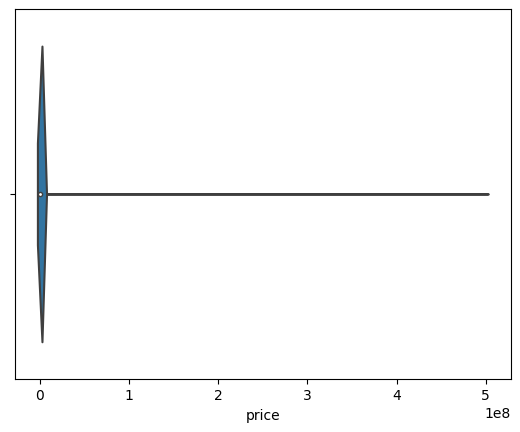

In [141]:
sns.violinplot(x= 'price', data=df_rental)

<p>According to the Kenya property center dataset  it gives the highest rent value in Nairobi county to be 600,0000 and the lowest being 5500</p>
<p>Remove observations that are not in the range of 700,000 and 1,000</p>

In [142]:
df_rental.shape

(4871, 17)

In [143]:
#remove price greater than 700000
df_rental = df_rental[df_rental.price < 700000]

In [144]:
#remove price less than 4000
df_rental = df_rental[df_rental.price > 4000]

<Axes: xlabel='price'>

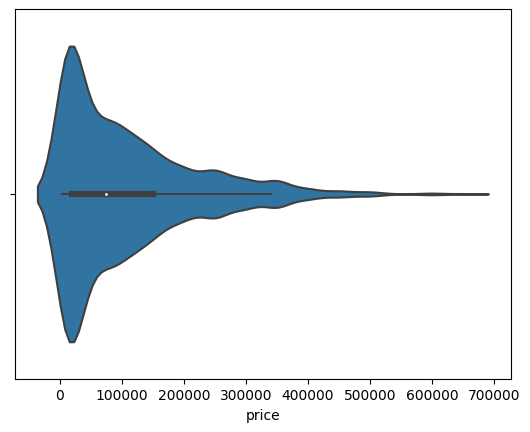

In [145]:
sns.violinplot(x= 'price', data=df_rental)

<Axes: xlabel='price'>

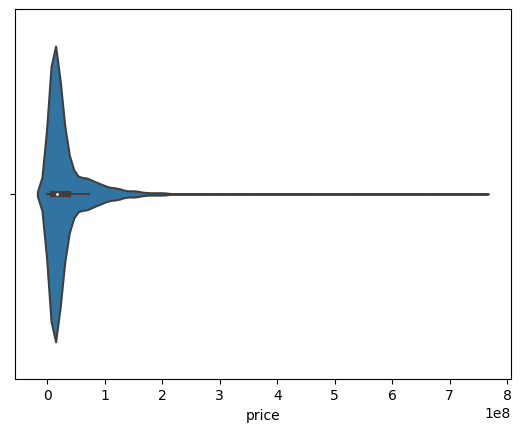

In [146]:
sns.violinplot(x= 'price', data=df_sale)

In [147]:
df_sale.loc[(df_sale['price']<500000)].head()

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate
484,485,14.5,Missing,2,2,0.0,0,0,0,0,For Sale,Apartment,Missing,Mombasa,Likoni,Missing,19/07/2021 00:00
704,705,160000.0,Missing,3,3,0.0,0,0,0,0,For Sale,Apartment,Missing,Nairobi,Westlands,Missing,20/07/2021 00:00
1025,1026,80000.0,Missing,3,4,0.0,0,0,0,0,For Sale,Apartment,Missing,Nairobi,Westlands,Missing,21/07/2021 00:00
1395,1396,14.5,Missing,2,2,0.0,0,0,0,0,For Sale,Apartment,Missing,Nairobi,Westlands,Missing,21/07/2021 00:00
2057,2058,350000.0,Missing,5,5,0.0,0,0,0,2,For Sale,House,Missing,Nairobi,Kahawa West,Missing,23/07/2021 00:00


In [148]:
df_sale.loc[(df_sale['price']<600000)].shape

(37, 17)

<p>We remove lot whose sale value is less than 600,000</p>

In [149]:
#remove price greater than 600000
df_sale = df_sale[df_sale.price > 600000]
df_sale.shape

(4597, 17)

In [150]:
df_sale.sort_values(by='price').tail(10)

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate
10121,10122,400000000.0,Missing,6,7,7.0,0,0,0,7,For Sale,House,Missing,Nairobi,Muthaiga,Missing,27/09/2022 01:02
7167,7168,400000000.0,Missing,7,6,0.0,0,0,0,0,For Sale,House,Missing,Nairobi,Westlands,Missing,26/08/2021 01:12
10333,10334,430000000.0,Missing,4,4,4.0,0,0,0,0,For Sale,House,Missing,Nairobi,Karen,Missing,10/10/2022 00:03
492,493,450000000.0,Missing,9,8,0.0,0,0,0,0,For Sale,House,Detached Duplex,Nairobi,Lavington,Missing,19/07/2021 00:00
9685,9686,500000000.0,Missing,6,8,8.0,0,0,0,5,For Sale,House,Missing,Nairobi,Muthaiga,Missing,07/09/2022 23:09
2746,2747,500000000.0,Missing,3,3,0.0,0,0,0,0,For Sale,House,Townhouse,Nairobi,Karen,Missing,24/07/2021 21:03
9686,9687,650000000.0,Missing,5,7,7.0,0,0,0,5,For Sale,House,Missing,Nairobi,Muthaiga,Missing,07/09/2022 23:17
10120,10121,650000000.0,Missing,5,6,6.0,0,0,0,7,For Sale,House,Missing,Nairobi,Muthaiga,Missing,27/09/2022 00:59
491,492,700000000.0,Missing,4,4,0.0,0,0,0,0,For Sale,House,Townhouse,Nairobi,Lavington,Missing,19/07/2021 00:00
498,499,750000000.0,Missing,10,10,0.0,0,0,0,0,For Sale,House,Missing,Nairobi,Nairobi Central,Missing,19/07/2021 00:00


<p>We are going to remove sale values are more than 100 million</p>

In [151]:
df.loc[(df['price']>100000000)].shape

(246, 17)

In [152]:
df_sale = df_sale[df_sale.price < 100000000]
df_sale.shape

(4276, 17)

In [153]:
df_sale.shape

(4276, 17)

In [154]:
df_rental.shape

(4824, 17)

In [155]:
#combine two dataframes into one
df=pd.concat([df_rental,df_sale])
df.shape

(9100, 17)

In [156]:
df.shape

(9100, 17)

In [157]:
df.loc[(df['sub_locality']=='Missing')].shape


(8504, 17)

In [158]:
#drop the sub-locality column since more than 50% of the valus are missing
df.drop('sub_locality', inplace=True, axis=1)

In [159]:
df.loc[(df['price_qualifier']=='Missing')].shape

(4360, 16)

In [160]:
df.state.value_counts()

Nairobi          5379
Kiambu           1270
Kajiado           755
Mombasa           734
Machakos          281
Kilifi            177
Nakuru            132
Kisumu             93
Uasin Gishu        33
Laikipia           26
Embu               25
Kwale              23
Meru               22
Nandi              20
Nyeri              16
Baringo            15
Makueni            12
Muranga            11
Bungoma             9
Kitui               8
Kirinyaga           7
Trans Nzoia         7
Kericho             7
Kisii               6
Isiolo              5
Kakamega            5
Bomet               3
Busia               3
Nyandarua           3
Homa Bay            2
Lamu                2
Tharaka-Nithi       1
Garissa             1
Marsabit            1
Samburu             1
Vihiga              1
Migori              1
Narok               1
Turkana             1
West Pokot          1
Name: state, dtype: int64

In [161]:
df.loc[(df['state']!='Nairobi')&(df['state']!='Kiambu')&(df['state']!='Kajiado')&(df['state']!='Mombasa')].shape

(962, 16)

In [162]:
#remove properties in states that have less than 500 in rental properties
df=df.loc[(df['state']=='Nairobi')|(df['state']=='Kiambu')|(df['state']=='Kajiado')|(df['state']=='Mombasa')]
df.shape

(8138, 16)

In [163]:
df=df[df.groupby('locality').locality.transform('count')>=75]
df.shape

(6930, 16)

<h2>Changing colummns to the correct data type</h2>

In [164]:
#convert data type listdate to date
df['listdate']= pd.to_datetime(df['listdate'])

In [165]:
df.drop('price_qualifier', inplace=True, axis=1)

In [166]:
df.head()

,id,price,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,listdate
6,7,200000.0,5,5,5.0,0,0,0,0,For Rent,House,Townhouse,Nairobi,Nairobi Central,2021-07-18
7,8,100000.0,3,3,3.0,0,0,0,0,For Rent,Apartment,Missing,Nairobi,Parklands,2021-07-18
9,10,120000.0,3,3,3.0,0,0,0,0,For Rent,Apartment,Missing,Nairobi,Lavington,2021-07-18
10,11,180000.0,2,2,2.0,1,0,0,0,For Rent,Apartment,Missing,Nairobi,Westlands,2021-07-18
12,13,270000.0,4,4,4.0,0,0,0,0,For Rent,House,Townhouse,Nairobi,Lavington,2021-07-18


In [167]:
df.tail()

,id,price,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,listdate
16099,16107,26000000.0,3,4,0.0,0,0,0,0,For Sale,Apartment,Missing,Nairobi,Kileleshwa,2023-06-16 11:55:00
16103,16111,6450000.0,1,1,1.0,0,0,0,0,For Sale,Apartment,Missing,Nairobi,Westlands,2023-06-16 12:21:00
16104,16112,10650000.0,2,2,2.0,0,0,0,0,For Sale,Apartment,Missing,Nairobi,Westlands,2023-06-16 12:23:00
16108,16116,5800000.0,4,4,4.0,0,0,0,4,For Sale,House,Detached Bungalow,Kajiado,Ongata Rongai,2023-06-16 13:08:00
16115,16123,6000000.0,3,3,3.0,0,0,0,4,For Sale,House,Detached Bungalow,Kajiado,Kitengela,2023-06-16 14:54:00


In [168]:
# Save cleaned dataframe to new file
df.to_csv('cleaned_listings.csv', index=None)